In [1]:
#from yellowbrick.text import TSNEVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer
from lxml import etree
from nltk import word_tokenize
import pickle
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import glob
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
dfndum_set = set()
new_dfndum_lst = [0]
tot_dfndum_lst = [0]
rep_ratio = []
term_cnt = Counter()
perc_array = np.array([])
for xml_path in glob.glob('/mnt/glossary/math*/*.xml.gz'):
    gtree = etree.parse(xml_path).getroot()
    for art in gtree.iter(tag='article'):
        d_lst = [d.text for d in art.findall('.//dfndum')]
        dfndum_set.update(d_lst)
        term_cnt.update(d_lst)
        new_dfndum_lst.append(len(dfndum_set))
        tot_dfndum_lst.append(tot_dfndum_lst[-1] + len(d_lst))
        rep_ratio.append(tot_dfndum_lst[-1]/len(dfndum_set))
        
        N = float(art.attrib['num'])
        percs = np.array(list(float(a.attrib['index']) for a in art.findall('.//definition')))/N
        perc_array = np.append(perc_array, percs)
        if len(dfndum_set)%100000 == 0:
            print(len(dfndum_set))

200000
400000
400000
500000
1000000


In [27]:
print(f"Total # of term: {tot_dfndum_lst[-1]:,d}")
print(f"# of distinct terms: {new_dfndum_lst[-1]:,d}")
s = 100000
term_cnt.most_common()[s:s+50]
#term_cnt['local stability properties']

Total # of term: 7,663,300
# of distinct terms: 1,388,916


[('peripheral end', 7),
 ('dual root datum', 7),
 ('semihereditary ring', 7),
 ('complex lattice', 7),
 ('Grundy sequence', 7),
 ('_inline_math_-fold scroll', 7),
 ('collision map', 7),
 ('trailing coefficient', 7),
 ('_inline_math_-coherent extension', 7),
 ('Siegel case', 7),
 ('quotient chain', 7),
 ('hyperspecial vertex', 7),
 ('Seifert Klein bottle', 7),
 ('interval neutrosophic set', 7),
 ('bivariant', 7),
 ('parity of', 7),
 ('positive half-twist', 7),
 ('Brauer classes', 7),
 ('toric prime divisors', 7),
 ('Jacobi-Trudi formula', 7),
 ('Euler inner product', 7),
 ('_inline_math_th facet', 7),
 ('Hessian K3 surface', 7),
 ('Fermat cubic surface', 7),
 ('Gowers _inline_math_-norm', 7),
 ('superspace concentrated', 7),
 ('support data', 7),
 ('plumbed manifold', 7),
 ('Liebnitz rule', 7),
 ('Fraïssé structures', 7),
 ('Bergman property', 7),
 ('Fibonacci sequences', 7),
 ('partial _inline_math_-frame', 7),
 ('discrete Legendre transform', 7),
 ('weak*-closure of', 7),
 ('pushoff o

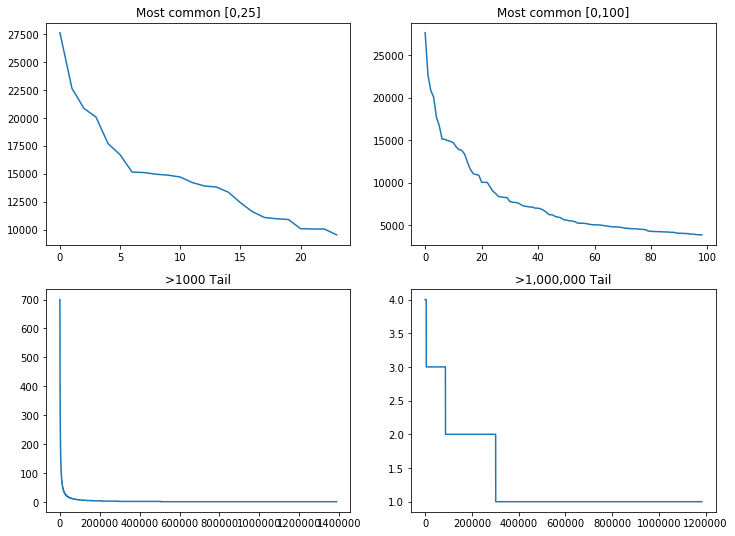

In [12]:
#plt.plot(term_cnt.values())
plt.figure(figsize=[12,9])
plt.subplot(221)
plt.plot([t[1] for t in term_cnt.most_common()][1:25])
plt.title("Most common [0,25]")
plt.subplot(222)
plt.title("Most common [0,100]")
plt.plot([t[1] for t in term_cnt.most_common()][1:100])
plt.subplot(223)
plt.plot([t[1] for t in term_cnt.most_common()][1000:])
plt.title(">1000 Tail")
plt.subplot(224)
plt.plot([t[1] for t in term_cnt.most_common()][205000:])
plt.title(">1,000,000 Tail")
plt.show()

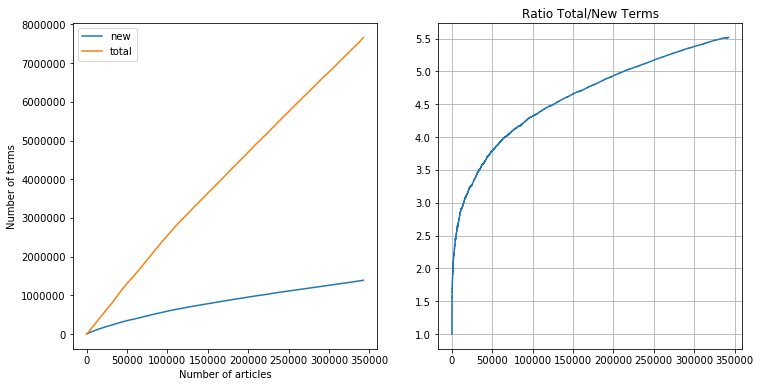

In [57]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(new_dfndum_lst, label='new')
plt.plot(tot_dfndum_lst, label='total')
#plt.title('New terms in math.AG 2015')
plt.ylabel('Number of terms')
plt.xlabel('Number of articles')
plt.legend()
plt.subplot(122)
plt.plot(rep_ratio)
plt.yticks(np.arange(1,6,0.5))
plt.grid(True)
plt.title('Ratio Total/New Terms')
plt.show()

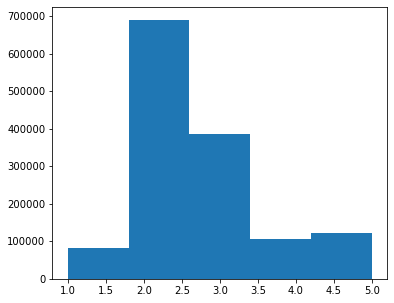

['adhérence de toute composante connexe de',
 'ensemble des _inline_math_-points est celui des',
 'Le groupe de Picard de la compactification de',
 'quasi isomÃ©trique Ã une mÃ©trique plate sur',
 'un faisceau topologique de Lefschetz de base']

In [31]:
# number of terms in a Defdum
fig=plt.figure(figsize=(6, 5))
n_words = [min(5,len(w.split())) for w in dfndum_set]
plt.hist(n_words, 5)
plt.show()
[w for w in dfndum_set if len(w.split()) > 5][:5]

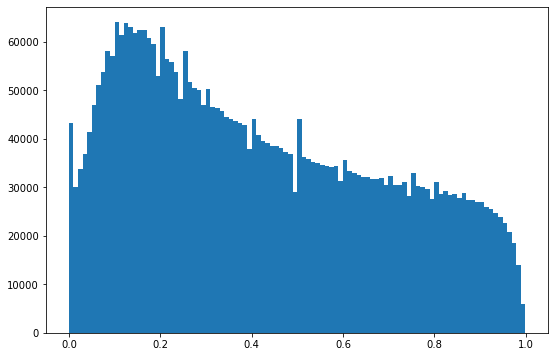

In [29]:
plt.figure(figsize=[9,6])
plt.hist(perc_array,100)
plt.show()

In [14]:
with open('data/mathAG_2015_just_text.txt', 'w+') as mathag:
    for k,D in enumerate(ag.iter(tag='definition')):
        try:
            print(D.find('.//dfndum').text,' --- ', (D.find('.//stmnt').text), file=mathag)
            print('***', file=mathag)
        except:
            pass
        if False: break

In [35]:
empty_if_none = lambda s: s if s else ''
ag_lst = [p.text for p in ag.iter(tag='stmnt') if len(empty_if_none(p.text))> 5][:300]
dg_lst = [p.text for p in dg.iter(tag='stmnt') if len(empty_if_none(p.text))> 5][:300]

In [23]:
tot_vec = vzer.transform(ag_lst + dg_lst)

In [33]:
# ag is zero and dg is 1
labels_vec = len(ag_lst)*['math.AG'] + len(dg_lst)*['math.DG']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


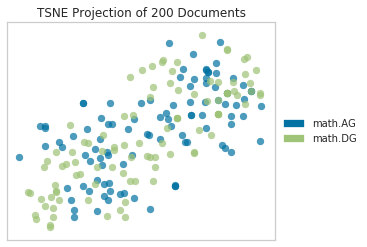

In [34]:
tsne2 = TSNEVisualizer(labels=['math.AG','math.DG'])
tsne2.fit(tot_vec, labels_vec)
tsne2.poof(figsize=50)